In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal( 
     mean=[0, 3], 
     cov=[[1, 0.5],[0.5, 1]], 
     size=num_samples_per_class) 

positive_samples = np.random.multivariate_normal( 
     mean=[3, 0], 
     cov=[[1, 0.5],[0.5, 1]], 
     size=num_samples_per_class)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))

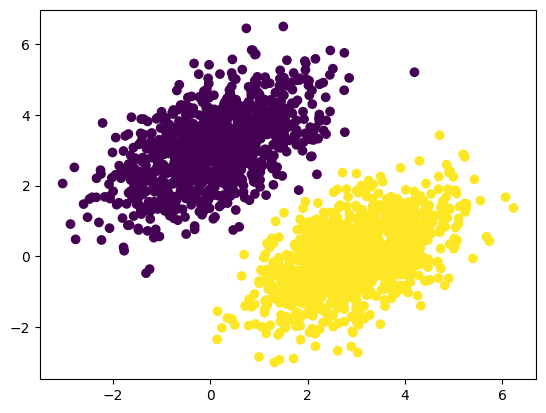

In [5]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [6]:
targets.shape[1]

1

In [12]:
input_dim = inputs.shape[1]
output_dim = targets.shape[1]
W = tf.Variable(initial_value = tf.random.uniform(shape =(input_dim, output_dim) )) 
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))


In [13]:
def model_fn(inputs):
    return tf.matmul(inputs, W) + b

In [14]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) 
    return tf.reduce_mean(per_sample_losses) 

In [15]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape: 
        predictions = model_fn(inputs) 
        loss = square_loss(predictions, targets) 
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
    W.assign_sub(grad_loss_wrt_W * learning_rate) 
    b.assign_sub(grad_loss_wrt_b * learning_rate) 
    
    return loss

In [16]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.6151
Loss at step 1: 0.6751
Loss at step 2: 0.2207
Loss at step 3: 0.1414
Loss at step 4: 0.1214
Loss at step 5: 0.1113
Loss at step 6: 0.1034
Loss at step 7: 0.0963
Loss at step 8: 0.0899
Loss at step 9: 0.0841
Loss at step 10: 0.0788
Loss at step 11: 0.0740
Loss at step 12: 0.0696
Loss at step 13: 0.0656
Loss at step 14: 0.0619
Loss at step 15: 0.0585
Loss at step 16: 0.0555
Loss at step 17: 0.0527
Loss at step 18: 0.0502
Loss at step 19: 0.0479
Loss at step 20: 0.0458
Loss at step 21: 0.0438
Loss at step 22: 0.0421
Loss at step 23: 0.0405
Loss at step 24: 0.0390
Loss at step 25: 0.0377
Loss at step 26: 0.0365
Loss at step 27: 0.0354
Loss at step 28: 0.0344
Loss at step 29: 0.0335
Loss at step 30: 0.0326
Loss at step 31: 0.0319
Loss at step 32: 0.0312
Loss at step 33: 0.0305
Loss at step 34: 0.0300
Loss at step 35: 0.0294
Loss at step 36: 0.0289
Loss at step 37: 0.0285
Loss at step 38: 0.0281
Loss at step 39: 0.0277


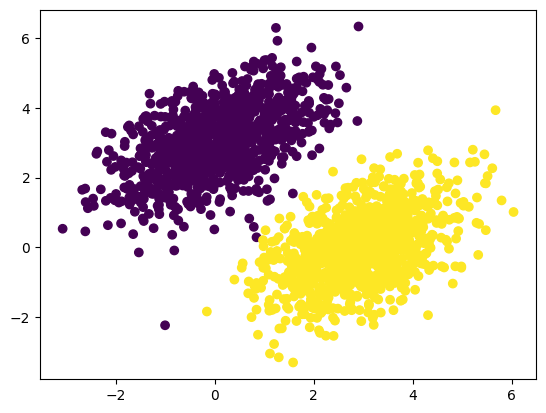

In [27]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

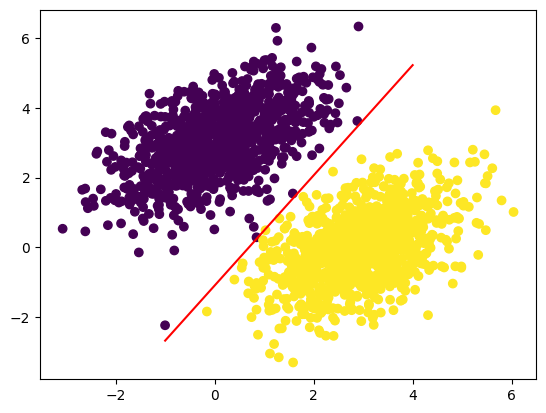

In [28]:
x = np.linspace(-1, 4, 100) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r") 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [102]:
class CustomModel():
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
        self.input_dim = inputs.shape[1]
        self.output_dim = targets.shape[1]
        self.W = tf.Variable(initial_value = tf.random.uniform(shape =(input_dim, output_dim) )) 
        self.b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))
        
    def model_fn(self, inputs):
        return tf.matmul(inputs, self.W) + self.b
    
    
    def square_loss(self, targets, predictions):
        per_sample_losses = tf.square(targets - predictions) 
        return tf.reduce_mean(per_sample_losses) 
    
    def training_step(self):
        learning_rate = 0.1
        with tf.GradientTape() as tape: 
            predictions = self.model_fn(self.inputs) 
            loss = self.square_loss(predictions, self.targets) 
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [self.W, self.b]) 
        self.W.assign_sub(grad_loss_wrt_W * learning_rate) 
        self.b.assign_sub(grad_loss_wrt_b * learning_rate) 
        
        logs = {}
        logs['loss'] = loss
        return  logs        

In [103]:
### train_step

model = CustomModel(inputs, targets)

In [104]:
epochs =  40
for epoch in range(epochs):
    logs = model.training_step()
    
    print(f'Traning rasults at epoch {epoch}')
    for key, value in logs.items():
        print(f'...{key} : {value:.4f}')
    

Traning rasults at epoch 0
...loss : 3.4948
Traning rasults at epoch 1
...loss : 0.4678
Traning rasults at epoch 2
...loss : 0.1747
Traning rasults at epoch 3
...loss : 0.1331
Traning rasults at epoch 4
...loss : 0.1204
Traning rasults at epoch 5
...loss : 0.1117
Traning rasults at epoch 6
...loss : 0.1040
Traning rasults at epoch 7
...loss : 0.0970
Traning rasults at epoch 8
...loss : 0.0907
Traning rasults at epoch 9
...loss : 0.0849
Traning rasults at epoch 10
...loss : 0.0796
Traning rasults at epoch 11
...loss : 0.0748
Traning rasults at epoch 12
...loss : 0.0704
Traning rasults at epoch 13
...loss : 0.0664
Traning rasults at epoch 14
...loss : 0.0628
Traning rasults at epoch 15
...loss : 0.0595
Traning rasults at epoch 16
...loss : 0.0565
Traning rasults at epoch 17
...loss : 0.0537
Traning rasults at epoch 18
...loss : 0.0512
Traning rasults at epoch 19
...loss : 0.0489
Traning rasults at epoch 20
...loss : 0.0468
Traning rasults at epoch 21
...loss : 0.0449
Traning rasults at e